In [1]:
# !pip install scanpy leidenalg rpy2
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import umap
from anndata import AnnData
import os
# sc.settings.set_figure_params(dpi=200)
sc.settings.verbosity = 1 # verbosity: errors (0), warnings (1), info (2), hints (3)
%load_ext rpy2.ipython

# sns.set(font_scale=1.5)
# plt.style.use('seaborn-white')

In [18]:
import scanpy as sc

hvgs = sc.read_h5ad('/media/leon/Masha/ATAC/tmp_h5ad/hvgs.h5ad')
hvgs = [i.replace(':', '\t') for i in hvgs.var_names]
hvgs = [i.replace('-', '\t') for i in hvgs]
hvgs = ['chr' + i if (i[0].isdigit() or i[0] == 'X' or i[0] == 'Y') else i for i in hvgs]
with open('/media/leon/Masha/ATAC/hvgs.bed', 'w') as file:
    for i in hvgs:
        file.write(i + '\n')

In [17]:
[i for i in hvgs if not (i[0].isdigit() or i[0] == 'X' or i[0] == 'Y')]

['KI270728.1-232290-233180',
 'KI270727.1-52054-52964',
 'GL000009.2-110983-111876',
 'GL000009.2-115815-116723',
 'GL000194.1-2244-3253',
 'GL000194.1-5886-6862',
 'GL000194.1-106023-106769',
 'GL000194.1-117569-118203',
 'GL000195.1-24837-25610',
 'GL000195.1-50816-51840',
 'GL000195.1-66644-67398',
 'GL000195.1-137274-138173',
 'GL000219.1-55770-56654',
 'GL000219.1-107741-108567',
 'GL000219.1-125164-125908',
 'GL000219.1-143502-144300',
 'GL000219.1-159814-160654']

In [19]:
peaks = open('/media/leon/Masha/ATAC/aggr/outs/filtered_peak_bc_matrix/peaks.bed').read().splitlines()
peaks[-10:]

['KI270711.1\t27244\t28070',
 'KI270711.1\t29206\t29487',
 'KI270713.1\t2618\t3413',
 'KI270713.1\t3954\t4854',
 'KI270713.1\t8140\t9018',
 'KI270713.1\t12997\t13924',
 'KI270713.1\t15289\t15991',
 'KI270713.1\t21455\t22369',
 'KI270713.1\t32804\t33581',
 'KI270713.1\t34316\t35040']

In [15]:
import pandas as pd
import os

dct = {'29': 'JYH792', '33': 'MM110', '4': 'MM123', '5': 'MM124', '9': 'MM56', '11': 'MM59', '17': 'MM80', '19': 'MM86', '22': 'MM89', '25': 'MM95', '28': 'MM98', '31': 'MM108', '8': 'MM55', '13': 'MM61', '14': 'MM77', '15': 'MM78', '20': 'MM87', '23': 'MM93', '26': 'MM96', '30': 'JYH809', '32': 'MM109', '34': 'MM12', '1': 'MM120', '2': 'MM121', '3': 'MM122', '6': 'MM51', '7': 'MM54', '10': 'MM57', '12': 'MM60', '16': 'MM79', '18': 'MM81', '21': 'MM88', '24': 'MM94', '27': 'MM97'}
barcodes = open('/media/leon/Masha/ATAC/final_barcodes.txt').read().splitlines()
for i in range(61, 95):
    os.chdir(f'/media/leon/Masha/ATAC/CR_output/sample{i}/outs/filtered_peak_bc_matrix')
    b = [j for j in barcodes if j.startswith(dct[str(i-60)]+'_')]
    b = [j.split('_')[1] + '-1' for j in b]
    with open('qc_features.txt', 'w') as file:
        for k in b:
            file.write(k + '\n')

In [18]:
i = 94
b = [j for j in barcodes if j.startswith(dct[str(i-60)]+'_')]
b = [j.split('_')[1] + '-1' for j in b]
b

['AAACGAAAGAAGAGTG-1',
 'AAACGAAAGCAACTGG-1',
 'AAACGAAAGTTGCTTG-1',
 'AAACGAACAAACAGTA-1',
 'AAACGAACACTGTAAC-1',
 'AAACGAAGTCGCGCTA-1',
 'AAACGAAGTGCGCTCA-1',
 'AAACGAAGTGCGTAGA-1',
 'AAACGAAGTTTAAGCC-1',
 'AAACGAATCAGGCCGT-1',
 'AAACGAATCCGGGCAT-1',
 'AAACGAATCTCGACAA-1',
 'AAACTCGAGCCTGTAT-1',
 'AAACTCGAGGTGTTGG-1',
 'AAACTCGAGTGAGCTG-1',
 'AAACTCGCAGAATGCG-1',
 'AAACTCGCATTAGCAC-1',
 'AAACTCGGTAAGCCTT-1',
 'AAACTCGGTACTTCAG-1',
 'AAACTCGGTCTCAAAC-1',
 'AAACTCGTCCTTACGC-1',
 'AAACTCGTCTCTATTG-1',
 'AAACTGCAGCAGTAGC-1',
 'AAACTGCAGCCATGGA-1',
 'AAACTGCCAAAGAAGG-1',
 'AAACTGCCATCCCTTG-1',
 'AAACTGCGTACTTCAG-1',
 'AAACTGCGTCACAGGA-1',
 'AAACTGCGTCCCTTTG-1',
 'AAACTGCGTGCAAGCA-1',
 'AAACTGCGTTCGGGAA-1',
 'AAACTGCTCCTGACCT-1',
 'AAACTGCTCTTATCAC-1',
 'AAAGATGAGCTAACAA-1',
 'AAAGATGAGTCGTACT-1',
 'AAAGATGAGTGCAACG-1',
 'AAAGATGCAAATAGTG-1',
 'AAAGATGCAACGAGGT-1',
 'AAAGATGCACCCTTAC-1',
 'AAAGATGGTAGCGTTT-1',
 'AAAGATGGTCGAGAAC-1',
 'AAAGATGGTTCTGAGT-1',
 'AAAGATGTCGATGTAC-1',
 'AAAGATGTC

In [ ]:
with open('/media/leon/Masha/ATAC/qc.txt', 'w') as file:
    for i in range(61, 95):
        wd = f'/media/leon/Masha/ATAC/CR_output/sample{i}/outs'

        data = sc.read_10x_h5(wd + '/filtered_peak_bc_matrix.h5')
        barcodes = list(data.obs_names)

        df = pd.read_csv(wd + '/singlecell.csv')
        df = df[df.barcode.isin(barcodes)]
        
        df['frac_tss'] = df.TSS_fragments / df.passed_filters
        df['frac_peaks'] = df.peak_region_fragments / df.passed_filters
        df['frac_mito'] = df.mitochondrial / df.total
        df['unique_nucl_reads'] = df.passed_filters

        df = df[df['frac_mito'] < 0.2]
        df = df[df['frac_tss'] > 0.15]
        df = df[df['frac_peaks'] > 0.2]
        df = df[df['total'] > 1000]
        df = df[(df['frac_tss'] < df['frac_tss'].quantile(0.99)) & (df['frac_peaks'] < df['frac_peaks'].quantile(0.99)) & (df['unique_nucl_reads'] < df['unique_nucl_reads'].quantile(0.99))]

        qc_barcodes = [j.split('-')[0] + '-' + str(i-60) for j in list(df.barcode)]
        for j in qc_barcodes:
            file.write(j + '\n')    

In [62]:
dct = {'29': 'JYH792', '33': 'MM110', '4': 'MM123', '5': 'MM124', '9': 'MM56', '11': 'MM59', '17': 'MM80', '19': 'MM86', '22': 'MM89', '25': 'MM95', '28': 'MM98', '31': 'MM108', '8': 'MM55', '13': 'MM61', '14': 'MM77', '15': 'MM78', '20': 'MM87', '23': 'MM93', '26': 'MM96', '30': 'JYH809', '32': 'MM109', '34': 'MM12', '1': 'MM120', '2': 'MM121', '3': 'MM122', '6': 'MM51', '7': 'MM54', '10': 'MM57', '12': 'MM60', '16': 'MM79', '18': 'MM81', '21': 'MM88', '24': 'MM94', '27': 'MM97'}

all_barcodes = open('/media/leon/Masha/ATAC/all_barcodes.txt').read().splitlines()
qc_barcodes = open('/media/leon/Masha/ATAC/qc_final4.txt').read().splitlines()
qc_barcodes = [dct[i.split('-')[1]] + '_' + i.split('-')[0] for i in qc_barcodes]
barcodes = set(all_barcodes).intersection(set(qc_barcodes))
print(len(all_barcodes), len(qc_barcodes), len(barcodes))

218973 246073 207803


In [90]:
os.chdir('/media/leon/Masha/ATAC')

all = open('./aggr/outs/filtered_peak_bc_matrix/barcodes.tsv').read().splitlines()
qc = open('qc.txt').read().splitlines()
excluded = set(all) - set(qc)

# doublets = []
# for i in range(61, 95):
#     d = open(f'/media/leon/Masha/ATAC/doublets/doublets_{i}.txt').read().splitlines()
#     d = [j.split('-')[0] + '-' + str(i-60) for j in d]
#     doublets.extend(d)
    
doublets = open('/media/leon/Masha/ATAC/doublets/all_doublets.txt').read().splitlines()
left = set(all) - set(excluded).union(set(doublets))

print(f'qc-filtered {len(excluded)} ({round((len(excluded)) / len(all) * 100, 1)}%) out of {len(all)}')
print(f'doublets {len(doublets)} ({round((len(doublets)) / len(all) * 100, 1)}%)') 
print(f'left {len(left)} ({round(len(left)/len(all), 1) * 100}%) ')

# with open('/media/leon/Masha/ATAC/filtered_barcodes.txt', 'w') as file:
#     for i in left:
#         file.write(i + '\n')

qc-filtered 52304 (17.5%) out of 298377
doublets 26079 (8.7%)
left 224261 (80.0%) 


In [2]:
data = sc.read_h5ad('/media/leon/Masha/ATAC/data.h5ad')
data

/home/leon/anaconda3/lib/python3.11/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 222729 × 127988
    obs: 'orig.ident', 'nCount_peaks', 'nFeature_peaks', 'total', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'passed_filters', 'duplicate', 'is__cell_barcode', 'nucleosome_signal', 'nucleosome_percentile', 'pct_reads_in_peaks', 'peaks_snn_res.0.8', 'seurat_clusters', 'peaks_snn_res.0.5', 'peaks_snn_res.0.2', 'nCount_RNA', 'nFeature_RNA'
    var: 'count', 'percentile'
    uns: 'neighbors'
    obsm: 'X_lsi', 'X_umap'
    varm: 'LSI'
    obsp: 'distances'

In [ ]:
total_number_of_cells, passed_filters_peaks, high_quality_peaks, high_quality_tss = [], [], [], []
for i in range(61, 95):
    summary = pd.read_csv(f'/media/leon/Masha/ATAC/CR_output/sample{i}/outs/summary.csv')
    total_number_of_cells.append(int(summary['Estimated number of cells']))
    passed_filters_peaks.append(float(summary['Fraction of all fragments that pass all filters and overlap called peaks']))
    high_quality_peaks.append(float(summary['Fraction of high-quality fragments overlapping peaks']))
    high_quality_tss.append(float(summary['Fraction of high-quality fragments overlapping TSS']))                       

298377

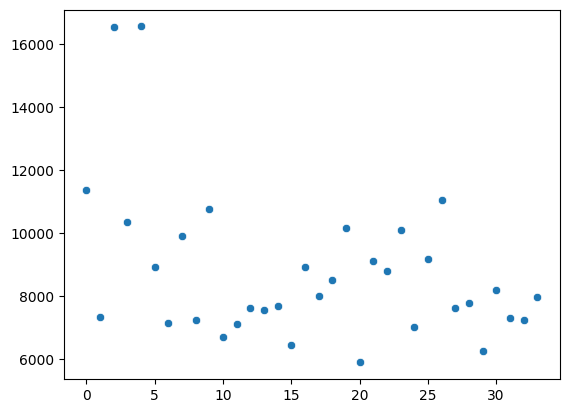

In [126]:
sns.scatterplot(total_number_of_cells)
sum(total_number_of_cells)

/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

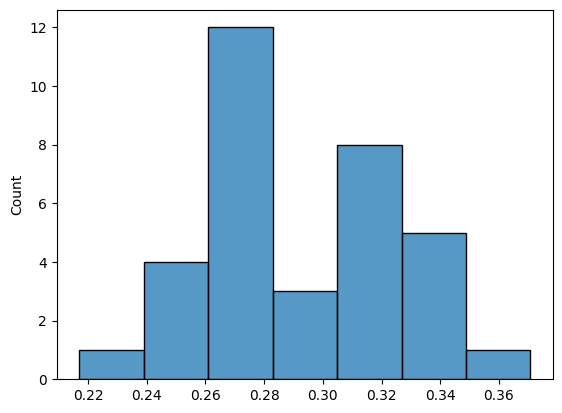

In [134]:
sns.histplot(high_quality_tss)

/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

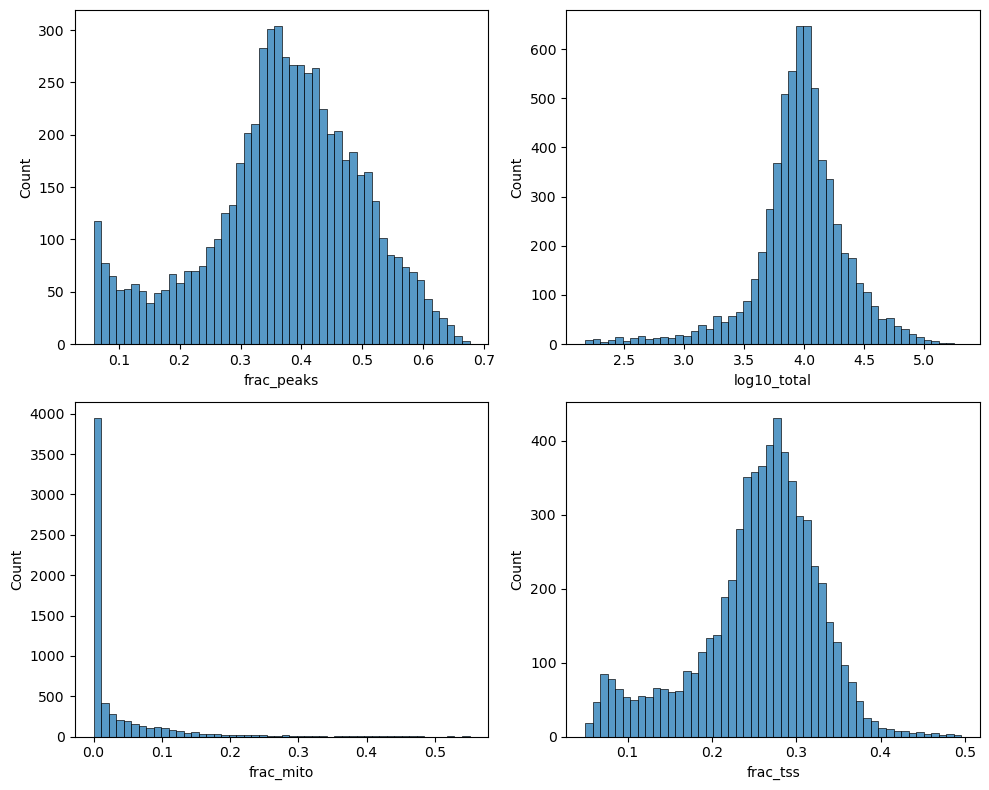

In [91]:
wd = f'/media/leon/Masha/ATAC/CR_output/sample90/outs'

adata = sc.read_mtx(wd + '/filtered_peak_bc_matrix/matrix.mtx').T

barcodes = open(wd + '/filtered_peak_bc_matrix/barcodes.tsv').read().splitlines()
adata.obs.index = barcodes

peaks = open(wd + '/filtered_peak_bc_matrix/peaks.bed').read().splitlines()
adata.var.index = peaks

df_counts = pd.DataFrame()
df_counts['index'] = adata.obs.index
df_counts.set_index('index', inplace=True)
df_counts['barcode'] = adata.obs.index
df_counts['sum_values'] = np.sum(adata.X.A, axis=1)

df = pd.read_csv(wd + '/singlecell.csv')
df = df[df.barcode.isin(barcodes)]
df = df.merge(df_counts, on='barcode', how='left')

df['frac_tss'] = df.TSS_fragments / df.passed_filters
df['frac_peaks'] = df.peak_region_fragments / df.passed_filters
df['frac_mito'] = df.mitochondrial / df.total
df['unique_nucl_reads'] = df.passed_filters
df['log10_sum_values'] = np.log10(df.sum_values)
df['log10_total'] = np.log10(df.total)
df['log10_passed_filters'] = np.log10(df.passed_filters)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df.frac_peaks, ax=axes[0, 0], bins=50)
sns.histplot(df.log10_total, ax=axes[0, 1], bins=50)
sns.histplot(df.frac_mito, ax=axes[1, 0], bins=50)
sns.histplot(df.frac_tss, ax=axes[1, 1], bins=50)

plt.tight_layout()
# plt.savefig('/media/leon/Masha/ATAC/JYH809_QC.png')
plt.show()

/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

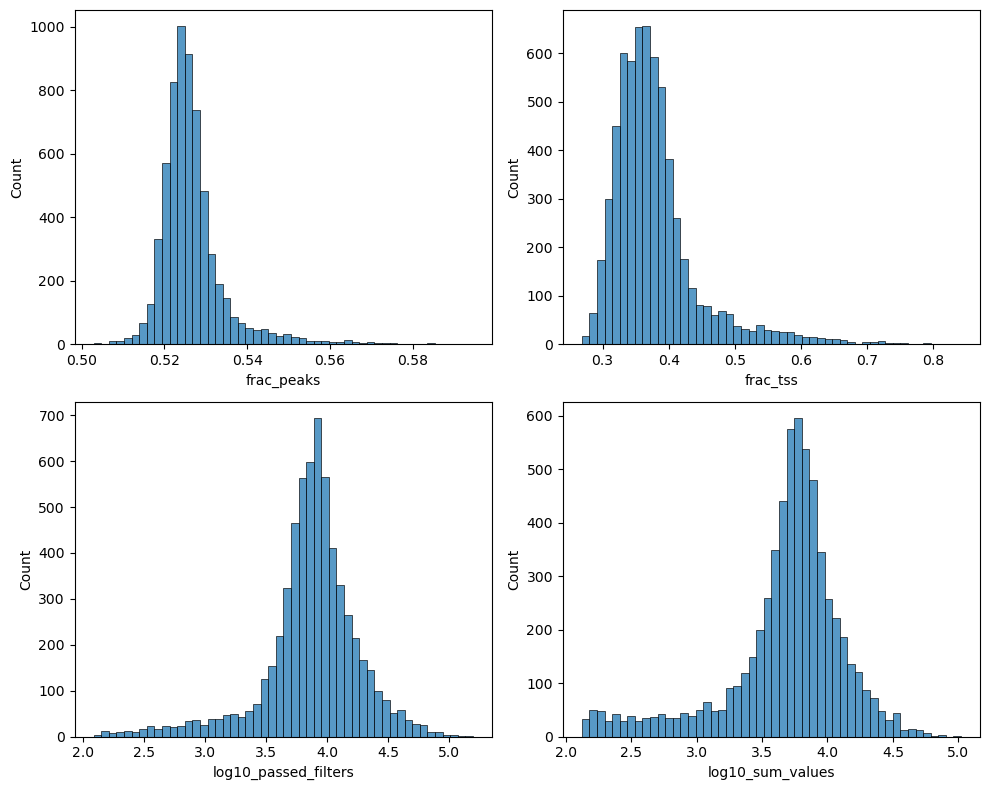

In [95]:
df['frac_tss'] = df.TSS_fragments / df.sum_values
df['frac_peaks'] = df.peak_region_fragments / df.sum_values
df['log10_sum_values'] = np.log10(df.sum_values)
df['log10_passed_filters'] = np.log10(df.passed_filters)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df.frac_peaks, ax=axes[0, 0], bins=50)
sns.histplot(df.frac_tss, ax=axes[0, 1], bins=50)
sns.histplot(df.log10_passed_filters, ax=axes[1, 0], bins=50)
sns.histplot(df.log10_sum_values, ax=axes[1, 1], bins=50)

plt.tight_layout()
plt.show()

In [7]:
#adata = sc.read_h5ad('/media/leon/Masha/ATAC/GSE169453_cell_cluster/cell_cluster/snATAC_all_5kb_raw.h5ad')
adata.shape

(218973, 557833)

In [5]:
with open('/media/leon/Masha/ATAC/all_barcodes.txt', 'w') as file:
    for j in list(adata.obs_names):
            file.write(j + '\n')

In [4]:
# параметры как в статье
all_barcodes = open('/media/leon/Masha/ATAC/all_barcodes.txt').read().splitlines()
qc_barcodes = open('/media/leon/Masha/ATAC/qc_barcodes.txt').read().splitlines()
qc_barcodes = [dct[i.split('-')[1]] + '_' + i.split('-')[0] for i in qc_barcodes]
barcodes = set(all_barcodes).intersection(set(qc_barcodes))
print(len(all_barcodes), len(qc_barcodes), len(barcodes))

218973 171370 154158


In [15]:
os.chdir('/media/leon/Masha/ATAC/aggr/outs/filtered_peak_bc_matrix')

adata = sc.read_mtx('matrix.mtx').T

barcodes = open('barcodes.tsv').read().splitlines()
qc_barcodes = open('/media/leon/Masha/ATAC/qc.txt').read().splitlines()
adata.obs.index = barcodes
adata = adata[adata.obs.index.isin(qc_barcodes)]

peaks = open('filtered_peaks.bed').read().splitlines()
peaks = [i.split('\t') if i.startswith('chr') else '-'.join(i.split('\t')) for i in peaks]
peaks = [''.join([i[0][3:], ':', i[1], '-', i[2]]) if i[0].startswith('chr') else i for i in peaks]
adata.var.index = peaks

adata = adata[:, peaks]

adata

View of AnnData object with n_obs × n_vars = 246073 × 139247

In [14]:
adata.write('/media/leon/Masha/ATAC/aggr/outs/filtered_peak_bc_matrix/qc_filtered.h5ad')

In [10]:
adata.X.shape

(246073, 139247)

In [2]:
adata = sc.read_h5ad('/media/leon/Masha/ATAC/aggr/outs/filtered_peak_bc_matrix/qc_filtered.h5ad')

In [16]:
dct = {'29': 'JYH792', '33': 'MM110', '4': 'MM123', '5': 'MM124', '9': 'MM56', '11': 'MM59', '17': 'MM80', '19': 'MM86', '22': 'MM89', '25': 'MM95', '28': 'MM98', '31': 'MM108', '8': 'MM55', '13': 'MM61', '14': 'MM77', '15': 'MM78', '20': 'MM87', '23': 'MM93', '26': 'MM96', '30': 'JYH809', '32': 'MM109', '34': 'MM12', '1': 'MM120', '2': 'MM121', '3': 'MM122', '6': 'MM51', '7': 'MM54', '10': 'MM57', '12': 'MM60', '16': 'MM79', '18': 'MM81', '21': 'MM88', '24': 'MM94', '27': 'MM97'}

adata.obs['sample'] = adata.obs.index.map(lambda x: x.split('-')[1])
adata.obs['donor'] = adata.obs.index.map(lambda x: dct[x.split('-')[1]])
adata.obs_names = [adata.obs['donor'][i] + '_' + adata.obs_names[i].split('-')[0] for i in range(len(adata.obs_names))]
adata.obs

/tmp/ipykernel_286831/239126338.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['sample'] = adata.obs.index.map(lambda x: x.split('-')[1])
/tmp/ipykernel_286831/239126338.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata.obs_names = [adata.obs['donor'][i] + '_' + adata.obs_names[i].split('-')[0] for i in range(len(adata.obs_names))]


,sample,donor
MM87_AAACGAAAGAAAGCAG,20,MM87
MM124_AAACGAAAGAAAGCAG,5,MM124
MM55_AAACGAAAGAAAGCAG,8,MM55
MM95_AAACGAAAGAACGTTA,25,MM95
MM121_AAACGAAAGAAGAGTG,2,MM121
...,...,...
MM12_TTTGTGTTCTTGGCCT,34,MM12
MM81_TTTGTGTTCTTGTCAT,18,MM81
MM55_TTTGTGTTCTTGTGCC,8,MM55
MM78_TTTGTGTTCTTTATCG,15,MM78


In [17]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_cells(adata, min_counts=1000)
sc.pp.filter_genes(adata, min_cells=0)

adata.obs['n_counts'] = adata.X.sum(axis=1).A1
adata.obs['log10_n_counts'] = np.log10(adata.obs['n_counts'])
adata.obs['log_n_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_peaks'] = (adata.X > 0).sum(axis=1)

adata.obs

,sample,donor,n_genes,n_counts,log10_n_counts,log_n_counts,n_peaks
MM87_AAACGAAAGAAAGCAG,20,MM87,2964,5863.0,3.768120,8.676416,2964
MM124_AAACGAAAGAAAGCAG,5,MM124,532,1018.0,3.007748,6.925595,532
MM55_AAACGAAAGAAAGCAG,8,MM55,5414,11378.0,4.056066,9.339437,5414
MM95_AAACGAAAGAACGTTA,25,MM95,1301,2460.0,3.390935,7.807917,1301
MM121_AAACGAAAGAAGAGTG,2,MM121,1950,3846.0,3.585009,8.254789,1950
...,...,...,...,...,...,...,...
MM12_TTTGTGTTCTTGGCCT,34,MM12,5985,12317.0,4.090505,9.418736,5985
MM81_TTTGTGTTCTTGTCAT,18,MM81,2696,5189.0,3.715084,8.554296,2696
MM55_TTTGTGTTCTTGTGCC,8,MM55,568,1060.0,3.025306,6.966024,568
MM78_TTTGTGTTCTTTATCG,15,MM78,982,1828.0,3.261976,7.510978,982


In [18]:
adata.obs[['frac_peaks', 'frac_tss']] = np.nan
for i in range(61, 95):
    wd = f'/media/leon/Masha/ATAC/CR_output/sample{i}/outs'
    df = pd.read_csv(wd + '/singlecell.csv')

    df.barcode = [dct[str(i-60)] + '_' + j.split('-')[0] for j in list(df.barcode)]
    df = df[df.barcode.isin(adata.obs_names)]
    df = df.set_index('barcode')

    df['frac_tss'] = df.TSS_fragments / df.passed_filters
    df['frac_peaks'] = df.peak_region_fragments / df.passed_filters
    df = df.drop(columns=[i for i in df.columns if i not in ['frac_peaks', 'frac_tss']])
    adata.obs.update(df, errors='raise')

adata.obs

,sample,donor,n_genes,n_counts,log10_n_counts,log_n_counts,n_peaks,frac_peaks,frac_tss
MM87_AAACGAAAGAAAGCAG,20,MM87,2964,5863.0,3.768120,8.676416,2964,0.490569,0.398837
MM124_AAACGAAAGAAAGCAG,5,MM124,532,1018.0,3.007748,6.925595,532,0.539780,0.465524
MM55_AAACGAAAGAAAGCAG,8,MM55,5414,11378.0,4.056066,9.339437,5414,0.475320,0.380915
MM95_AAACGAAAGAACGTTA,25,MM95,1301,2460.0,3.390935,7.807917,1301,0.462487,0.406955
MM121_AAACGAAAGAAGAGTG,2,MM121,1950,3846.0,3.585009,8.254789,1950,0.393038,0.318565
...,...,...,...,...,...,...,...,...,...
MM12_TTTGTGTTCTTGGCCT,34,MM12,5985,12317.0,4.090505,9.418736,5985,0.385677,0.274735
MM81_TTTGTGTTCTTGTCAT,18,MM81,2696,5189.0,3.715084,8.554296,2696,0.510506,0.409598
MM55_TTTGTGTTCTTGTGCC,8,MM55,568,1060.0,3.025306,6.966024,568,0.244022,0.209630
MM78_TTTGTGTTCTTTATCG,15,MM78,982,1828.0,3.261976,7.510978,982,0.307776,0.262392


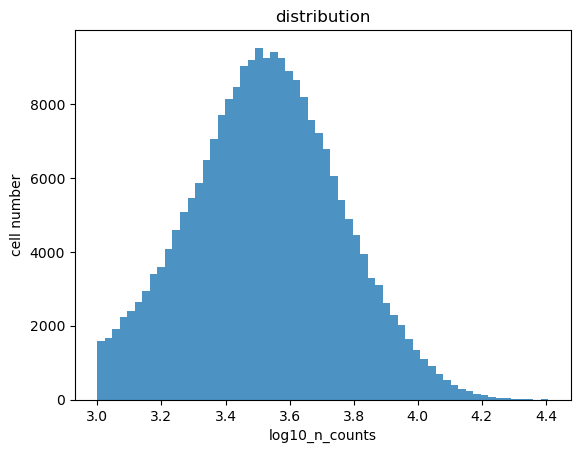

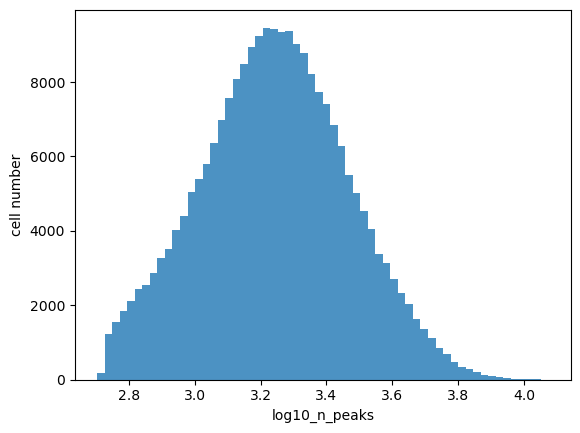

AnnData object with n_obs × n_vars = 233752 × 139247
    obs: 'sample', 'donor', 'n_genes', 'n_counts', 'log10_n_counts', 'log_n_counts', 'n_peaks', 'frac_peaks', 'frac_tss', 'log10_n_peaks'
    var: 'n_cells'

In [19]:
y=adata.obs['log10_n_counts']
plt.hist(y, bins=60, histtype="stepfilled", alpha=.8)
plt.xlabel("log10_n_counts")
plt.ylabel("cell number")
plt.title("distribution")
plt.show()

adata.obs['log10_n_peaks'] = np.log10(adata.obs['n_peaks'])
z = adata.obs['log10_n_peaks']
plt.hist(z, bins=60, histtype="stepfilled", alpha=.8)
plt.xlabel("log10_n_peaks")
plt.ylabel("cell number")
plt.show()
adata

In [20]:
adata = adata[adata.obs['n_counts']>1000,:]
adata = adata[adata.obs['n_peaks']>500,:]
adata

View of AnnData object with n_obs × n_vars = 233724 × 139247
    obs: 'sample', 'donor', 'n_genes', 'n_counts', 'log10_n_counts', 'log_n_counts', 'n_peaks', 'frac_peaks', 'frac_tss', 'log10_n_peaks'
    var: 'n_cells'

/tmp/ipykernel_286831/25543171.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  read_max=temp[round(qc_read.shape[0]*0.99)]
/tmp/ipykernel_286831/25543171.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gene_max=temp[round(qc_read.shape[0]*0.99)]


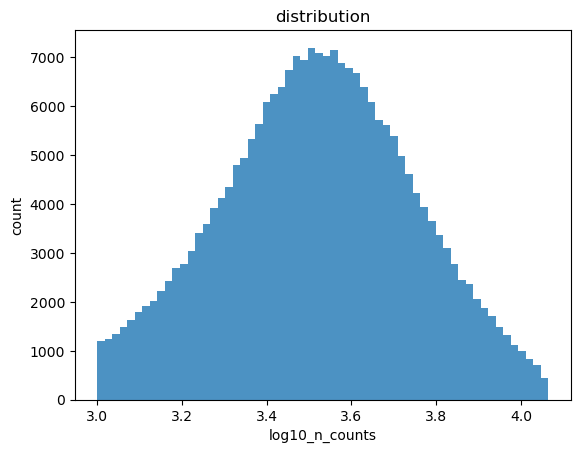

/tmp/ipykernel_286831/25543171.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['log10_n_peaks'] = np.log10(adata.obs['n_peaks'])


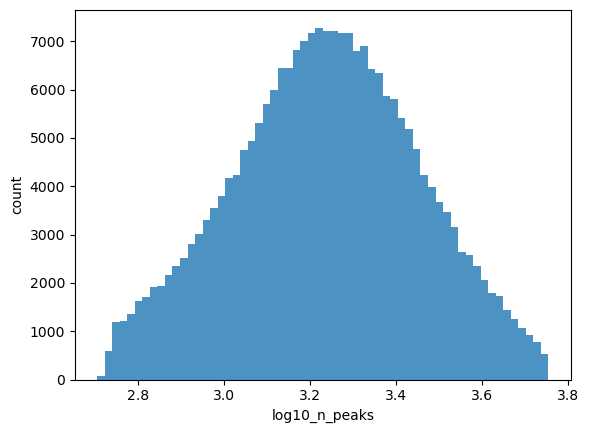

(231239, 139247)


In [21]:
####remove low quality cells: 2
###max read count
qc_read=adata.obs.sort_values('n_counts')
temp=qc_read['n_counts']
read_max=temp[round(qc_read.shape[0]*0.99)]

###max peaks frac
qc_gene=adata.obs.sort_values('n_peaks')
temp=qc_gene['n_peaks']
gene_max=temp[round(qc_read.shape[0]*0.99)]
#print(peak_max)

adata=adata[adata.obs['n_counts']<read_max,:]
adata=adata[adata.obs['n_peaks']<gene_max,:]

y=adata.obs['log10_n_counts']
plt.hist(y, bins=60, histtype="stepfilled", alpha=.8)
plt.xlabel("log10_n_counts")
plt.ylabel("count")
plt.title("distribution")
plt.show()

adata.obs['log10_n_peaks'] = np.log10(adata.obs['n_peaks'])
z = adata.obs['log10_n_peaks']
plt.hist(z, bins=60, histtype="stepfilled", alpha=.8)
plt.xlabel("log10_n_peaks")
plt.ylabel("count")
plt.show()
print(adata.X.shape)

In [22]:
adata_raw = sc.pp.log1p(adata, copy=True)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata_raw.obs

,sample,donor,n_genes,n_counts,log10_n_counts,log_n_counts,n_peaks,frac_peaks,frac_tss,log10_n_peaks
MM87_AAACGAAAGAAAGCAG,20,MM87,2964,5863.0,3.768120,8.676416,2964,0.490569,0.398837,3.471878
MM124_AAACGAAAGAAAGCAG,5,MM124,532,1018.0,3.007748,6.925595,532,0.539780,0.465524,2.725912
MM55_AAACGAAAGAAAGCAG,8,MM55,5414,11378.0,4.056066,9.339437,5414,0.475320,0.380915,3.733518
MM95_AAACGAAAGAACGTTA,25,MM95,1301,2460.0,3.390935,7.807917,1301,0.462487,0.406955,3.114277
MM121_AAACGAAAGAAGAGTG,2,MM121,1950,3846.0,3.585009,8.254789,1950,0.393038,0.318565,3.290035
...,...,...,...,...,...,...,...,...,...,...
MM60_TTTGTGTTCTTCGTTA,12,MM60,2189,4213.0,3.624591,8.345930,2189,0.452182,0.388157,3.340246
MM81_TTTGTGTTCTTGTCAT,18,MM81,2696,5189.0,3.715084,8.554296,2696,0.510506,0.409598,3.430720
MM55_TTTGTGTTCTTGTGCC,8,MM55,568,1060.0,3.025306,6.966024,568,0.244022,0.209630,2.754348
MM78_TTTGTGTTCTTTATCG,15,MM78,982,1828.0,3.261976,7.510978,982,0.307776,0.262392,2.992111


/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_deprecated/highly_variable_genes.py:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersion']


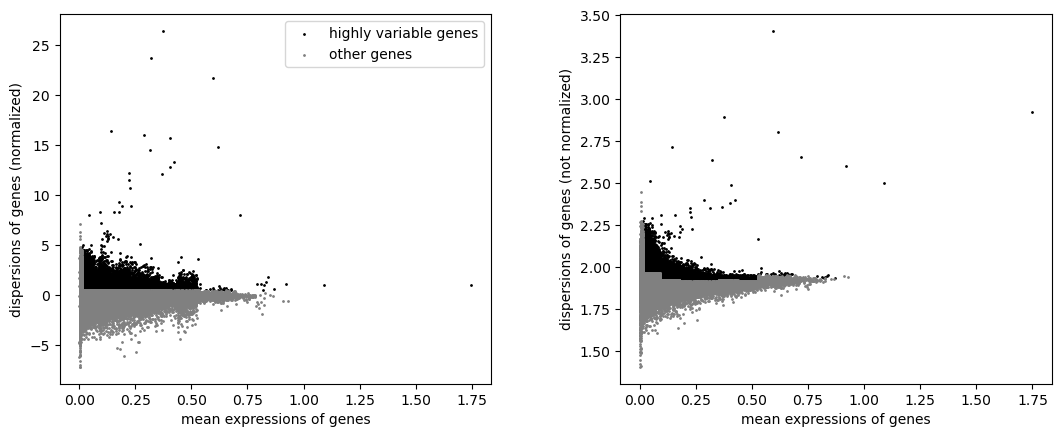

27937


In [23]:
adata_filter = sc.pp.filter_genes_dispersion(adata.X, flavor='seurat', n_bins=20)
sc.pl.filter_genes_dispersion(adata_filter, log=False, show=None, save=None)
hvgs = adata.var.loc[adata_filter.gene_subset].index.tolist()
print(len(hvgs))

In [24]:
samples_all=sorted(set(adata.obs['donor']))
for sample in samples_all:
    print((adata[adata.obs.index.str.contains(sample+'_'),:].shape))
    adata.var[sample] = (adata_raw.X > 0)[adata.obs.index.str.contains(sample+'_'),:].sum(axis=0).A1
hvgs = adata.var.loc[adata.var.index.isin(hvgs)]
hvgs = hvgs.loc[(hvgs>0).sum(axis=1)>(len(samples_all)-1)].index ### sample_all
adata.var = adata.var.drop(samples_all, axis=1)
print(len(hvgs))

(5197, 139247)
(4767, 139247)
(5801, 139247)
(5692, 139247)
(6217, 139247)
(4680, 139247)
(9380, 139247)
(5378, 139247)
(13173, 139247)
(7992, 139247)
(13896, 139247)
(7298, 139247)
(5036, 139247)
(7963, 139247)
(5445, 139247)
(8045, 139247)
(5190, 139247)
(5863, 139247)
(6098, 139247)
(6085, 139247)
(6491, 139247)
(4980, 139247)
(6856, 139247)
(6152, 139247)
(6021, 139247)
(7557, 139247)
(4280, 139247)
(5632, 139247)
(7401, 139247)
(7860, 139247)
(5561, 139247)
(7118, 139247)
(9641, 139247)
(6493, 139247)
27911


In [25]:
os.chdir('/media/leon/Masha/ATAC/tmp_h5ad')

In [26]:
## save highly variable peaks
bar_temp=adata.obs.index[0]
hv_h5ad=adata[adata.obs.index.str.contains(bar_temp), :]
hv_h5ad1=hv_h5ad[:, hv_h5ad.var.index.isin(hvgs)]
hv_h5ad1.write('hvgs.h5ad')

In [27]:
adata_orig = adata.copy()

In [28]:
hvgs_adata=sc.read('hvgs.h5ad')
hvgs=hvgs_adata.var.index
hvgs

/home/leon/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Index(['1:191050-191952', '1:804487-805376', '1:816713-817505',
       '1:817927-818440', '1:998711-999459', '1:1000469-1001016',
       '1:1006267-1007157', '1:1032727-1033528', '1:1040354-1041229',
       '1:1115821-1116713',
       ...
       'GL000194.1-117569-118203', 'GL000195.1-24837-25610',
       'GL000195.1-50816-51840', 'GL000195.1-66644-67398',
       'GL000195.1-137274-138173', 'GL000219.1-55770-56654',
       'GL000219.1-107741-108567', 'GL000219.1-125164-125908',
       'GL000219.1-143502-144300', 'GL000219.1-159814-160654'],
      dtype='object', length=27911)

In [29]:
## data regression
adata_ind = {}
for sample in sorted(set(adata.obs['donor'])):
    adata_ind[sample] = adata[adata.obs.index.str.contains(sample + '_'), :]
    adata_ind[sample] = adata_ind[sample][:, adata_ind[sample].var.index.isin(hvgs)]
    adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts
    print(adata_ind[sample].X.shape)

    sc.pp.log1p(adata_ind[sample])
    adata_ind_orig = adata_orig[adata_orig.obs.index.str.contains(sample + '_'), :]
    adata_ind[sample].obs['log10_usable_counts'] = np.log10(adata_ind_orig[:, adata_ind_orig.var.index.isin(hvgs)].X.sum(axis=1).A1)
    adata_ind[sample].obs['log_usable_counts'] = np.log(adata_ind_orig[:, adata_ind_orig.var.index.isin(hvgs)].X.sum(axis=1).A1)
    sc.pp.regress_out(adata_ind[sample], ['log_usable_counts'])
    sc.pp.scale(adata_ind[sample])

    adata_ind[sample].write('{}_reg.h5ad'.format(sample))
    adata_ind[sample]=None
    gc.collect()

adata_orig = adata_ind_orig = None
gc.collect()

## aggregate cells from all donors
samples_all = ['JYH792','JYH809','MM12','MM51','MM54','MM55','MM56','MM57','MM59','MM60','MM61','MM77','MM78','MM79','MM80','MM81','MM86','MM87','MM88','MM89','MM93','MM94','MM95','MM96','MM97','MM98','MM108','MM109','MM110','MM120','MM121','MM122','MM123','MM124']


adatas = {}
for sample in sorted(samples_all):
    adatas[sample]=sc.read_h5ad(f'{sample}_reg.h5ad')
adata_norm = AnnData.concatenate(adatas['JYH792'],adatas['JYH809'],adatas['MM108'],adatas['MM109'],adatas['MM110'],adatas['MM12'],adatas['MM120'],adatas['MM121'], adatas['MM122'],adatas['MM123'],adatas['MM124'],adatas['MM51'],adatas['MM54'],adatas['MM55'],adatas['MM56'],adatas['MM57'],adatas['MM59'],adatas['MM60'],adatas['MM61'],adatas['MM77'],adatas['MM78'],adatas['MM79'],adatas['MM80'],adatas['MM81'],adatas['MM86'],adatas['MM87'],adatas['MM88'],adatas['MM89'],adatas['MM93'],adatas['MM94'],adatas['MM95'],adatas['MM96'],adatas['MM97'],adatas['MM98'],join='inner',batch_key='donor', index_unique=None)
adatas=None
sc.pp.scale(adata_norm)
adata_norm.write('all_norm.h5ad')

/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5197, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(4767, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5801, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5692, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6217, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(4680, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(9380, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5378, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(13173, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(7992, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(13896, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(7298, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5036, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(7963, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5445, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(8045, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5190, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5863, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6098, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6085, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6491, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(4980, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6856, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6152, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6021, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(7557, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(4280, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5632, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(7401, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(7860, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(5561, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(7118, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(9641, 27911)


/tmp/ipykernel_286831/1383956812.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ind[sample].obs['norm_log_counts'] = np.log(adata_ind[sample].X.sum(axis=1).A1)  ###1,norm_log_counts


(6493, 27911)


/tmp/ipykernel_286831/1383956812.py:30: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_norm = AnnData.concatenate(adatas['JYH792'],adatas['JYH809'],adatas['MM108'],adatas['MM109'],adatas['MM110'],adatas['MM12'],adatas['MM120'],adatas['MM121'], adatas['MM122'],adatas['MM123'],adatas['MM124'],adatas['MM51'],adatas['MM54'],adatas['MM55'],adatas['MM56'],adatas['MM57'],adatas['MM59'],adatas['MM60'],adatas['MM61'],adatas['MM77'],adatas['MM78'],adatas['MM79'],adatas['MM80'],adatas['MM81'],adatas['MM86'],adatas['MM87'],adatas['MM88'],adatas['MM89'],adatas['MM93'],adatas['MM94'],adatas['MM95'],adatas['MM96'],adatas['MM97'],adatas['MM98'],join='inner',batch_key='donor', index_unique=None)


In [30]:
#### PCA
adata_norm=sc.read('all_norm.h5ad')
adata=None
adata_raw=None
sc.tl.pca(adata_norm, zero_center=False, random_state=0,svd_solver='arpack')
pc = pd.DataFrame(adata_norm.obsm['X_pca'], columns=['PC{}'.format(i) for i in range(1,51)], index=adata_norm.obs.index)
donor = adata_norm.obs['donor'].tolist()
donor

/home/leon/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [43]:
with open('/media/leon/Masha/ATAC/donor.txt', 'w') as file:
    for i in donor:
        file.write(i+'\n')
pc.to_csv('/media/leon/Masha/ATAC/pc.txt', )

In [5]:
# adata_norm.write('/media/leon/Masha/ATAC/adata_norm.h5ad')
adata_norm = sc.read_h5ad('/media/leon/Masha/ATAC/adata_norm.h5ad')
adata_norm

AnnData object with n_obs × n_vars = 208323 × 26655
    obs: 'sample', 'donor', 'n_genes', 'n_counts', 'log10_n_counts', 'log_n_counts', 'n_peaks', 'log10_n_peaks', 'norm_log_counts', 'log10_usable_counts', 'log_usable_counts'
    var: 'n_cells', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-10', 'std-10', 'mean-11', 'std-11', 'mean-12', 'std-12', 'mean-13', 'std-13', 'mean-14', 'std-14', 'mean-15', 'std-15', 'mean-16', 'std-16', 'mean-17', 'std-17', 'mean-18', 'std-18', 'mean-19', 'std-19', 'mean-2', 'std-2', 'mean-20', 'std-20', 'mean-21', 'std-21', 'mean-22', 'std-22', 'mean-23', 'std-23', 'mean-24', 'std-24', 'mean-25', 'std-25', 'mean-26', 'std-26', 'mean-27', 'std-27', 'mean-28', 'std-28', 'mean-29', 'std-29', 'mean-3', 'std-3', 'mean-30', 'std-30', 'mean-31', 'std-31', 'mean-32', 'std-32', 'mean-33', 'std-33', 'mean-4', 'std-4', 'mean-5', 'std-5', 'mean-6', 'std-6', 'mean-7', 'std-7', 'mean-8', 'std-8', 'mean-9', 'std-9', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'P

In [ ]:
donor = open('/media/leon/Masha/ATAC/donor.txt').read().splitlines()
donor

In [2]:
pc = pd.read_csv('/media/leon/Masha/ATAC/pc.txt', index_col=0)
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
JYH792_CTCTCAGGTAAGTCTC,-6.688022,-1.259020,-1.500495,-1.155334,1.490858,-0.164611,0.806594,0.075087,0.146669,-0.488712,...,-0.707007,-1.387208,0.984075,-0.136378,0.358427,-1.270113,1.503741,-0.054437,-0.258406,-0.492504
JYH792_GGGAACAAGGTAGGCT,3.360101,-4.027046,5.097434,1.061691,7.163025,2.133344,-2.446201,-3.982227,-0.109465,1.460592,...,-1.186013,-0.389908,0.410841,-1.202311,-1.058231,0.782550,-0.180890,-0.418262,0.647552,0.569504
JYH792_GTGACATAGTACAGTA,3.167310,0.170038,-0.368322,1.207357,0.797990,1.931348,2.184293,-0.173253,0.750256,-0.045616,...,-0.674299,-0.197613,0.056131,-1.083879,-1.134810,0.175557,-1.450368,0.535989,-0.257114,-0.217790
JYH792_CTGGCAGTCTCATATC,-1.315943,1.148880,-2.228604,-0.270707,-2.844107,-1.036391,-1.817015,2.375984,-1.890065,-0.780167,...,-0.208606,-0.993525,0.296438,-0.564174,-0.250668,0.502651,-1.002385,-1.413070,-0.377366,-0.606552
JYH792_CGGTGCATCTATCTAC,35.513737,-12.805490,0.030073,14.430403,3.804304,-9.579958,4.483970,4.665191,2.561451,1.719270,...,2.214613,-1.382880,-1.189385,1.649784,-2.909282,1.055779,5.004727,-0.911867,-0.814436,1.986761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MM98_CGCTATCCAACAACTC,-4.294027,-2.698266,2.537324,1.210426,-2.129735,-0.748452,-2.211545,-2.415368,-1.217127,1.271026,...,-1.045212,0.770161,-0.396166,-0.576750,-0.630040,-3.861373,-0.614860,1.998224,0.737238,-0.839506
MM98_GGCGTTGAGGTGTTGG,2.047297,3.308560,-0.897883,0.832499,0.145935,-0.543538,1.772637,-1.980521,0.055462,0.401871,...,-3.503746,1.404545,0.562478,0.133822,1.255014,0.589235,-0.621988,-0.406858,0.260517,1.104881
MM98_TTGCGGGAGGAAGACA,3.066361,1.578077,-1.183280,0.171668,0.667746,0.209427,0.649425,0.634719,-0.086342,-0.380767,...,-0.222202,0.050559,-0.600012,0.775216,-0.140877,1.509577,-0.679564,-0.426870,-0.379220,-0.997138
MM98_TGTGACATCTGAGTCA,-1.269156,0.453486,-3.660505,-1.267808,1.246374,-1.046422,-2.937886,-1.587713,-0.443366,0.513391,...,-0.124616,-0.726338,0.839611,0.097660,-0.628698,-0.427346,1.269202,0.207971,0.447599,-0.296549


In [24]:
%load_ext rpy2.ipython

/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


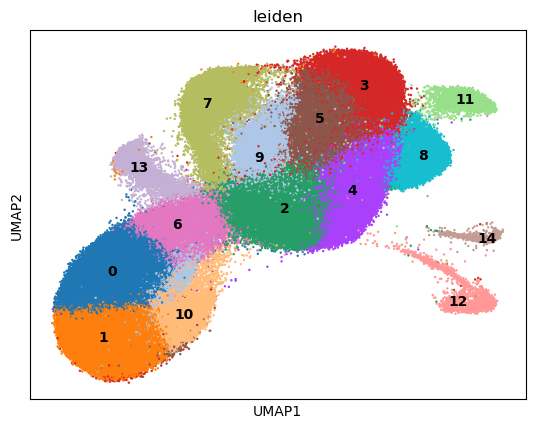

In [31]:
# cell cluster UMAP
# adata_norm.obsm['X_pca'] = harmonized.values
sc.pp.neighbors(adata_norm, n_neighbors=30, method='umap', metric='cosine', random_state=0, n_pcs=50) ##30, 50
sc.tl.leiden(adata_norm, resolution=1, random_state=0) ###resolution 1.5
sc.tl.umap(adata_norm, min_dist=0.3, random_state=0)   ###0.3
sc.pl.umap(adata_norm, color=['leiden'], size=12,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


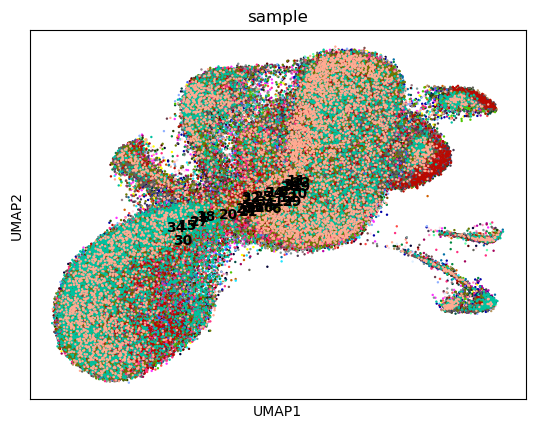

In [32]:
sc.pl.umap(adata_norm, color=['sample'], size=12,color_map='Blues',legend_loc='on data',legend_fontsize=10)

In [33]:
%%R -i pc -i donor -o harmonized

# .libPaths(c('/usr/lib64/R/library','/usr/share/R/library'))
# install.packages("devtools", repos='http://cran.us.r-project.org')
library(devtools)
# install_github("immunogenomics/harmony")

library(harmony)
library(magrittr)

meta_data=matrix(0,length(donor),2)
meta_data[,1]=as.character(donor)
meta_data[,2]=rownames(pc)
colnames(meta_data)=c('donor','cell')
meta_data=as.data.frame(meta_data)
class(meta_data)

batch <- as.factor(unlist(donor))
harmonized <- HarmonyMatrix(pc, meta_data,vars_use='donor',do_pca=FALSE)
harmonized <- data.frame(harmonized)

Загрузка требуемого пакета: usethis
Загрузка требуемого пакета: Rcpp
код методов в классе “Rcpp_harmony” не был проверен на подозрительные назначения полей (рекоммендуемый пакет ‘codetools’ не доступен?)
код методов в классе “Rcpp_harmony” не был проверен на подозрительные назначения полей (рекоммендуемый пакет ‘codetools’ не доступен?)
Transposing data matrix
Initializing state using k-means centroids initialization
Harmony 1/10
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 2/10
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|

/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


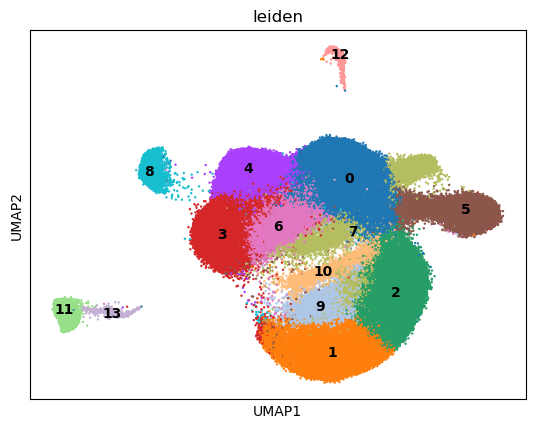

In [34]:
# cell cluster UMAP
adata_norm.obsm['X_pca'] = harmonized.values
sc.pp.neighbors(adata_norm, n_neighbors=30, method='umap', metric='cosine', random_state=0, n_pcs=50) ##30, 50
sc.tl.leiden(adata_norm, resolution=1, random_state=0) ###resolution 1.5
sc.tl.umap(adata_norm, min_dist=0.3, random_state=0)   ###0.3
sc.pl.umap(adata_norm, color=['leiden'], size=12,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


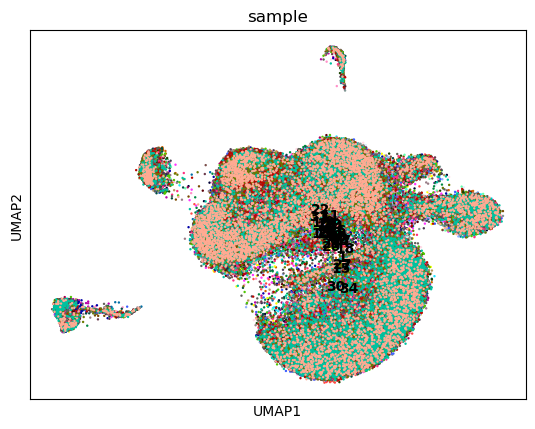

In [35]:
sc.pl.umap(adata_norm, color=['sample'], size=12,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


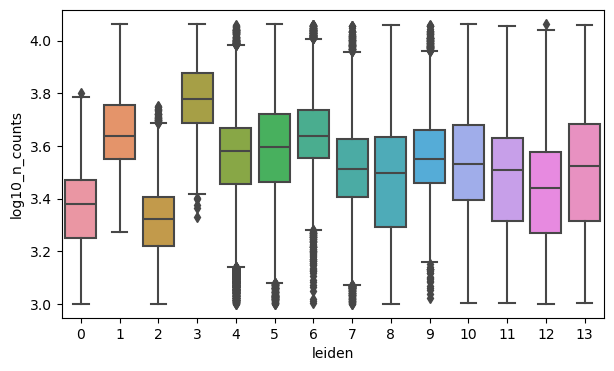

In [36]:
fig, ax1 = plt.subplots(1,1,figsize=(7,4))
sns.boxplot(x='leiden', y='log10_n_counts', data=adata_norm.obs)
plt.show()

/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


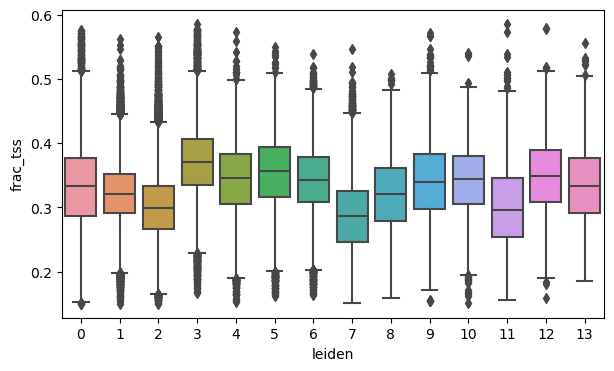

In [37]:
fig, ax1 = plt.subplots(1,1,figsize=(7,4))
sns.boxplot(x='leiden', y='frac_tss', data=adata_norm.obs)
plt.show()

/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


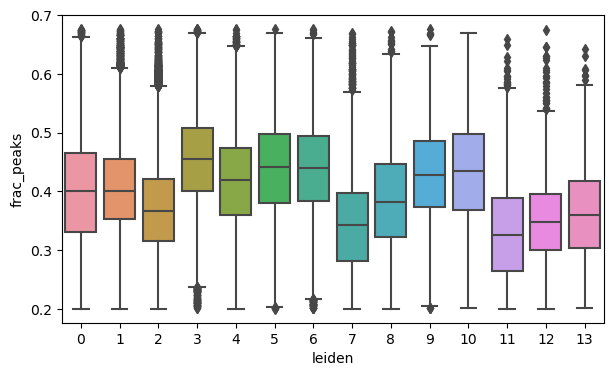

In [38]:
fig, ax1 = plt.subplots(1,1,figsize=(7,4))
sns.boxplot(x='leiden', y='frac_peaks', data=adata_norm.obs)
plt.show()

/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/leon/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


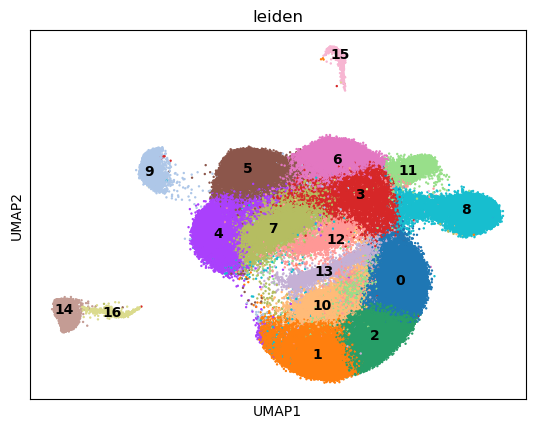

In [39]:
# cell cluster UMAP
# adata_norm.obsm['X_pca'] = harmonized.values
# sc.pp.neighbors(adata_norm, n_neighbors=30, method='umap', metric='cosine', random_state=0, n_pcs=50) ##30, 50
sc.tl.leiden(adata_norm, resolution=1.5, random_state=0) ###resolution 1.5
sc.tl.umap(adata_norm, min_dist=0.3, random_state=0)   ###0.3
sc.pl.umap(adata_norm, color=['leiden'], size=12,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/home/leon/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


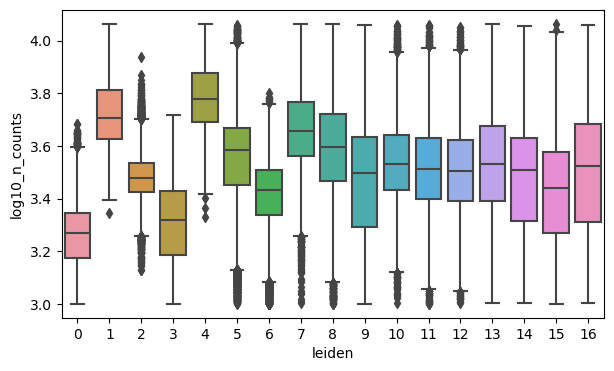

In [42]:
fig, ax1 = plt.subplots(1,1,figsize=(7,4))
sns.boxplot(x='leiden', y='log10_n_counts', data=adata_norm.obs)
plt.show()

/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


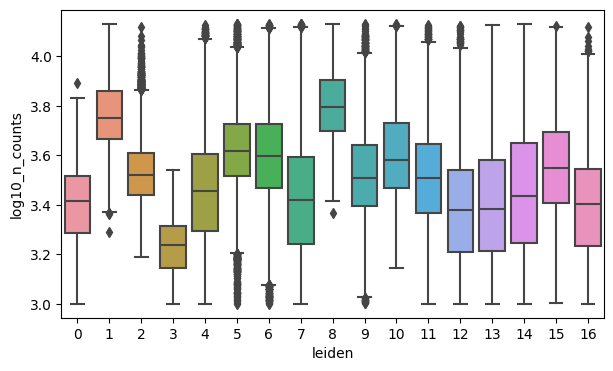

In [15]:
fig, ax1 = plt.subplots(1,1,figsize=(7,4))
sns.boxplot(x='leiden', y='log10_n_counts', data=adata_norm.obs)
plt.show()
#fig.savefig('/projects/sanderlab/gaowei/JP_notebook/figures/promoter.pdf')




/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


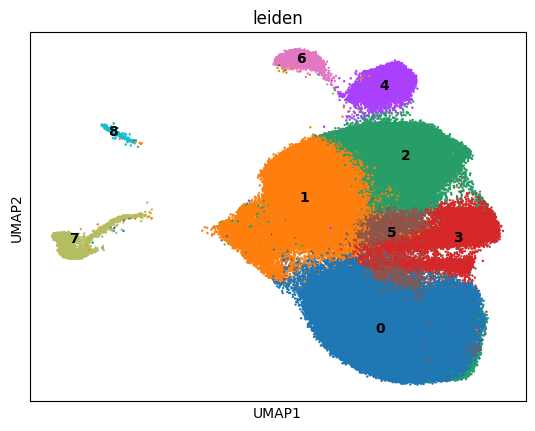

In [19]:
# cell cluster UMAP
# adata_norm.obsm['X_pca'] = harmonized.values
# sc.pp.neighbors(adata_norm, n_neighbors=30, method='umap', metric='cosine', random_state=0, n_pcs=50) ##30, 50
sc.tl.leiden(adata_norm, resolution=0.3, random_state=0) ###resolution 1.5
sc.tl.umap(adata_norm, min_dist=0.3, random_state=0)   ###0.3
sc.pl.umap(adata_norm, color=['leiden'], size=12,color_map='Blues',legend_loc='on data',legend_fontsize=10)

In [43]:
adata_norm.write('adata_final.h5ad')

In [58]:
# adata_norm = adata_norm[adata_norm.var.drop([['n_cells', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-10', 'std-10', 'mean-11', 'std-11', 'mean-12', 'std-12', 'mean-13', 'std-13', 'mean-14', 'std-14', 'mean-15', 'std-15', 'mean-16', 'std-16', 'mean-17', 'std-17', 'mean-18', 'std-18', 'mean-19', 'std-19', 'mean-2', 'std-2', 'mean-20', 'std-20', 'mean-21', 'std-21', 'mean-22', 'std-22', 'mean-23', 'std-23', 'mean-24', 'std-24', 'mean-25', 'std-25', 'mean-26', 'std-26', 'mean-27', 'std-27', 'mean-28', 'std-28', 'mean-29', 'std-29', 'mean-3', 'std-3', 'mean-30', 'std-30', 'mean-31', 'std-31', 'mean-32', 'std-32', 'mean-33', 'std-33', 'mean-4', 'std-4', 'mean-5', 'std-5', 'mean-6', 'std-6', 'mean-7', 'std-7', 'mean-8', 'std-8', 'mean-9', 'std-9', 'mean', 'std']], axis=0)]
with open('final_barcodes.txt', 'w') as file:
    for i in adata_norm.obs_names:
        file.write(i + '\n')

In [4]:
b = open('/media/leon/Masha/ATAC/final_barcodes.txt').read().splitlines()
dct = {'29': 'JYH792', '33': 'MM110', '4': 'MM123', '5': 'MM124', '9': 'MM56', '11': 'MM59', '17': 'MM80', '19': 'MM86', '22': 'MM89', '25': 'MM95', '28': 'MM98', '31': 'MM108', '8': 'MM55', '13': 'MM61', '14': 'MM77', '15': 'MM78', '20': 'MM87', '23': 'MM93', '26': 'MM96', '30': 'JYH809', '32': 'MM109', '34': 'MM12', '1': 'MM120', '2': 'MM121', '3': 'MM122', '6': 'MM51', '7': 'MM54', '10': 'MM57', '12': 'MM60', '16': 'MM79', '18': 'MM81', '21': 'MM88', '24': 'MM94', '27': 'MM97'}
dct = {v:k for k, v in dct.items()}
b = [i.split('_')[1] + '-' + dct[i.split('_')[0]] for i in b]
with open('/media/leon/Masha/ATAC/signac_barcodes.txt', 'w') as file:
    for i in b:
        file.write(i + '\n')

In [26]:
adata_norm.obs['frac_reads_in_peaks']=adata.obs['frac_peaks']
adata_norm.obs['frac_reads_in_promoters']=adata.obs['frac_tss']
adata_norm.obs['frac_mito_reads']=adata.obs['frac_mito']

KeyError: 'frac_peaks'

In [ ]:
%%R
library(Seurat)
library(SeuratData)
library(SeuratDisk)
library(Signac)

Convert("adata_final.h5ad", dest = "h5seurat", overwrite = TRUE)
data <- LoadH5Seurat("adata_final.h5seurat")

gene.activities <- GeneActivity(data)
data[['RNA']] <- CreateAssayObject(counts = gene.activities)

data <- NormalizeData(
  object = data,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(data$nCount_RNA)
)

SaveH5Seurat(data, filename = "genes.h5Seurat")
Convert("genes.h5Seurat", dest = "h5ad")

In [ ]:
adata = sc.read_h5ad('genes.h5ad')
adata

In [67]:
[i for i in adata_norm.var_names if i.startswith('17:3619')]

['17:36192107-36192996']

/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


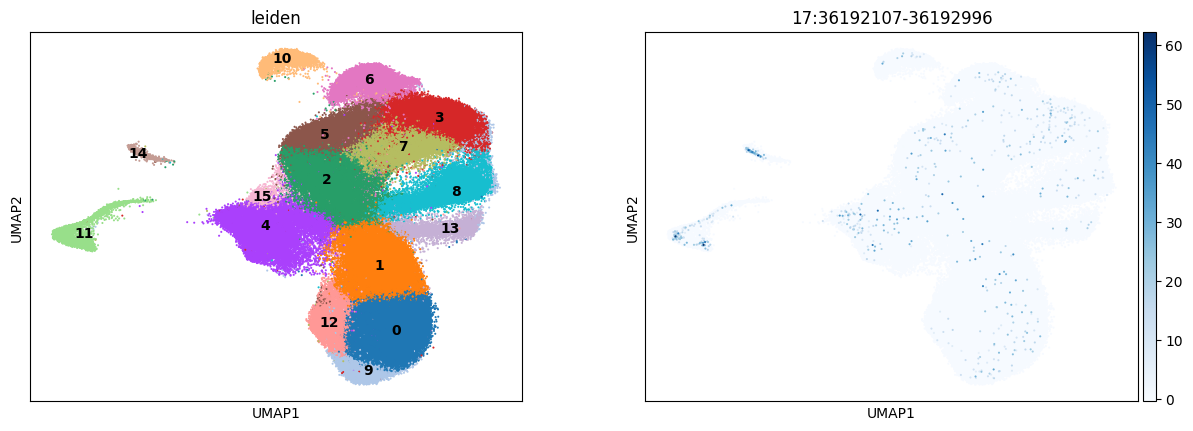

In [102]:
# CCL3 - immune
sc.pl.umap(adata_norm, color=['leiden', '17:36192107-36192996'], size=9,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'Could not find key 11:21615860-21616801 in .var_names or .obs.columns.'

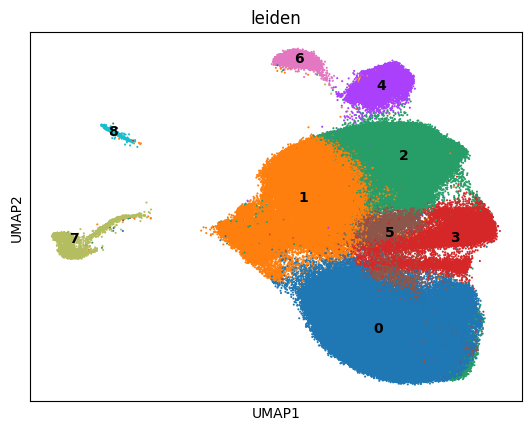

In [21]:
# INS
sc.pl.umap(adata_norm, color=['leiden', '11:21615860-21616801'], size=9,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


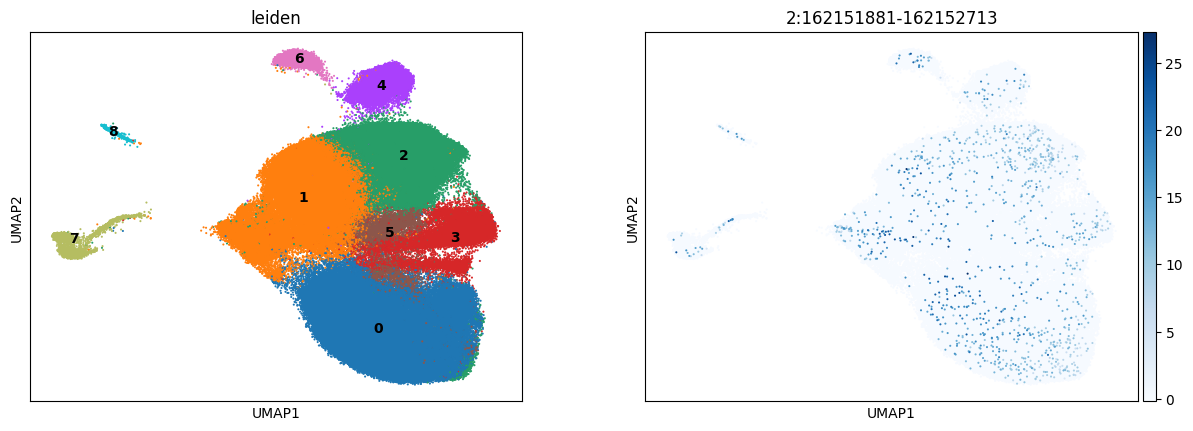

In [22]:
# GCG - alpha
sc.pl.umap(adata_norm, color=['leiden', '2:162151881-162152713'], size=9,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


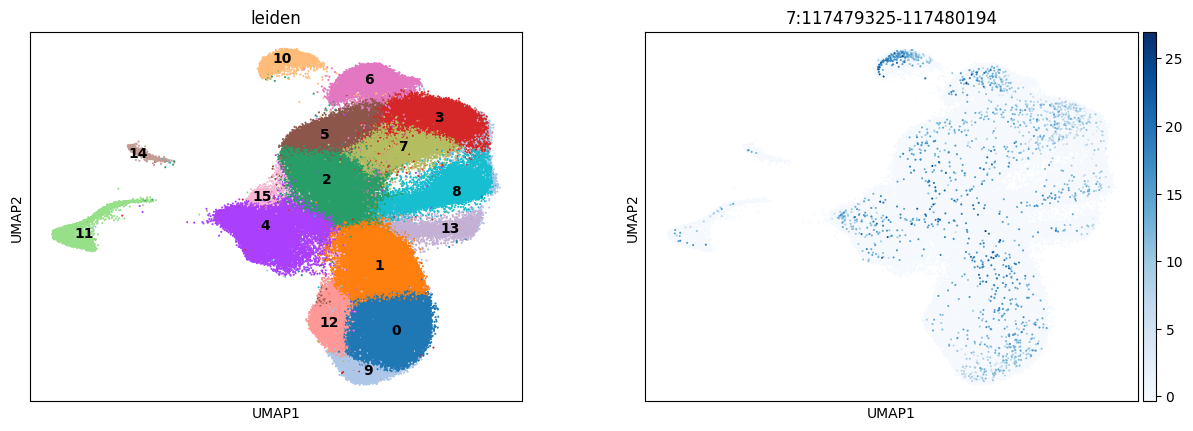

In [98]:
# CFTR - ductal
sc.pl.umap(adata_norm, color=['leiden', '7:117479325-117480194'], size=9,color_map='Blues',legend_loc='on data',legend_fontsize=10)

/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/media/leon/Masha/ATAC/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


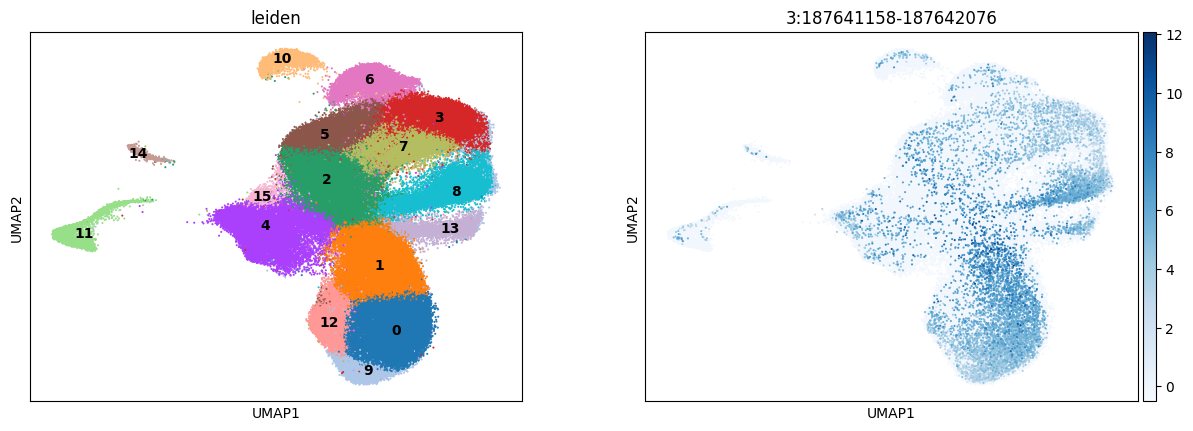

In [104]:
# SST - delta
sc.pl.umap(adata_norm, color=['leiden', '3:187641158-187642076'], size=9,color_map='Blues',legend_loc='on data',legend_fontsize=10)

In [108]:
[i for i in adata_norm.var_names if i.startswith('17:43')]

['17:43084334-43085215',
 '17:43251263-43252161',
 '17:43322036-43322849',
 '17:43530093-43530958',
 '17:43578569-43579404',
 '17:43874005-43874912']

In [ ]:
import muon as mu
from muon import atac as ac

In [ ]:
import rpy2.rinterface_lib.callbacks
import logging
from rpy2.robjects import pandas2ri
import anndata2ri

pandas2ri.activate()  # Automatically convert rpy2 outputs to pandas DataFrames
anndata2ri.activate()

In [ ]:
# Calculate general qc metrics using scanpy
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

# Rename columns
atac.obs.rename(
    columns={
        "n_genes_by_counts": "n_features_per_cell",
        "total_counts": "total_fragment_counts",
    },
    inplace=True,
)

# log-transform total counts and add as column
atac.obs["log_total_fragment_counts"] = np.log10(atac.obs["total_fragment_counts"])